In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded.
#Changing data type from Object to float.


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Checking whether any column contains NULL value.


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Describing the dataset

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Checking Duplicates

In [ ]:
df["customerID"].duplicated()

,customerID
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


#Converting 0 & 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
def conv(value):
  if value == 1:
    return ("Yes")
  else:
    return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#How many people have left the company(Churn)

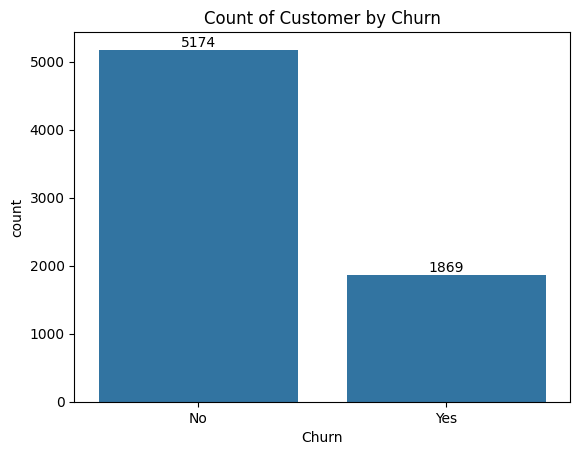

In [ ]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

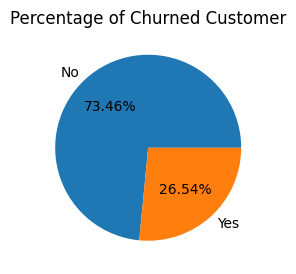

In [ ]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer")
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have Churned Out from the company.

#Now let's explore the reason behind it.

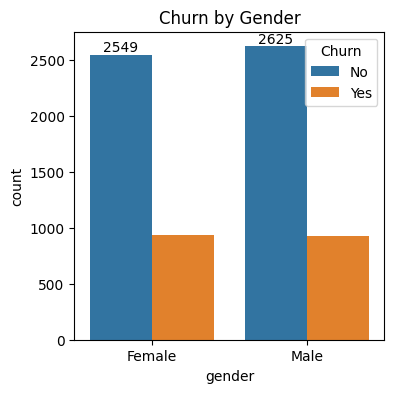

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")

plt.title("Churn by Gender")
ax.bar_label(ax.containers[0])
plt.show()

#Count of Customer by SeniorCitizen

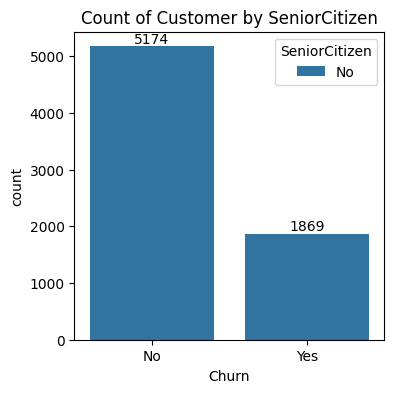

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Churn", data = df, hue = "SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")

plt.show()

<Figure size 400x300 with 0 Axes>

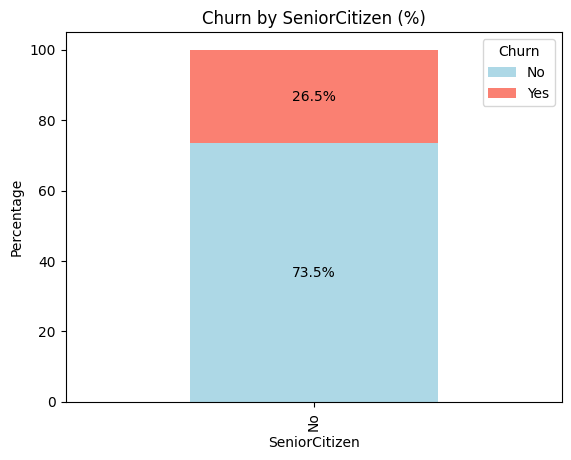

In [ ]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Create the plot
plt.figure(figsize=(4, 3))

# Plot the stacked bar chart
ax = df_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

# Add title
plt.title("Churn by SeniorCitizen (%)")

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

# Show plot
plt.ylabel("Percentage")
plt.show()

#Comparitive a greater percentage of people in senior citizen category have churned out.

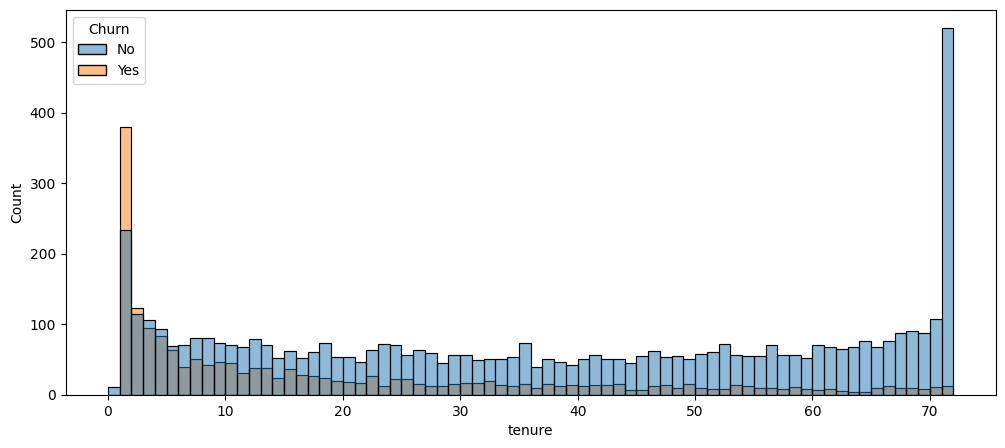

In [ ]:
plt.figure(figsize = (12,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

In [ ]:
#People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned out.

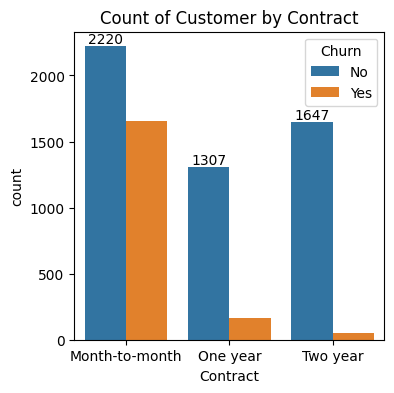

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")

plt.show()

# People how have month to month contract are likely to churn then from those who have 1 or 2 years of contract.


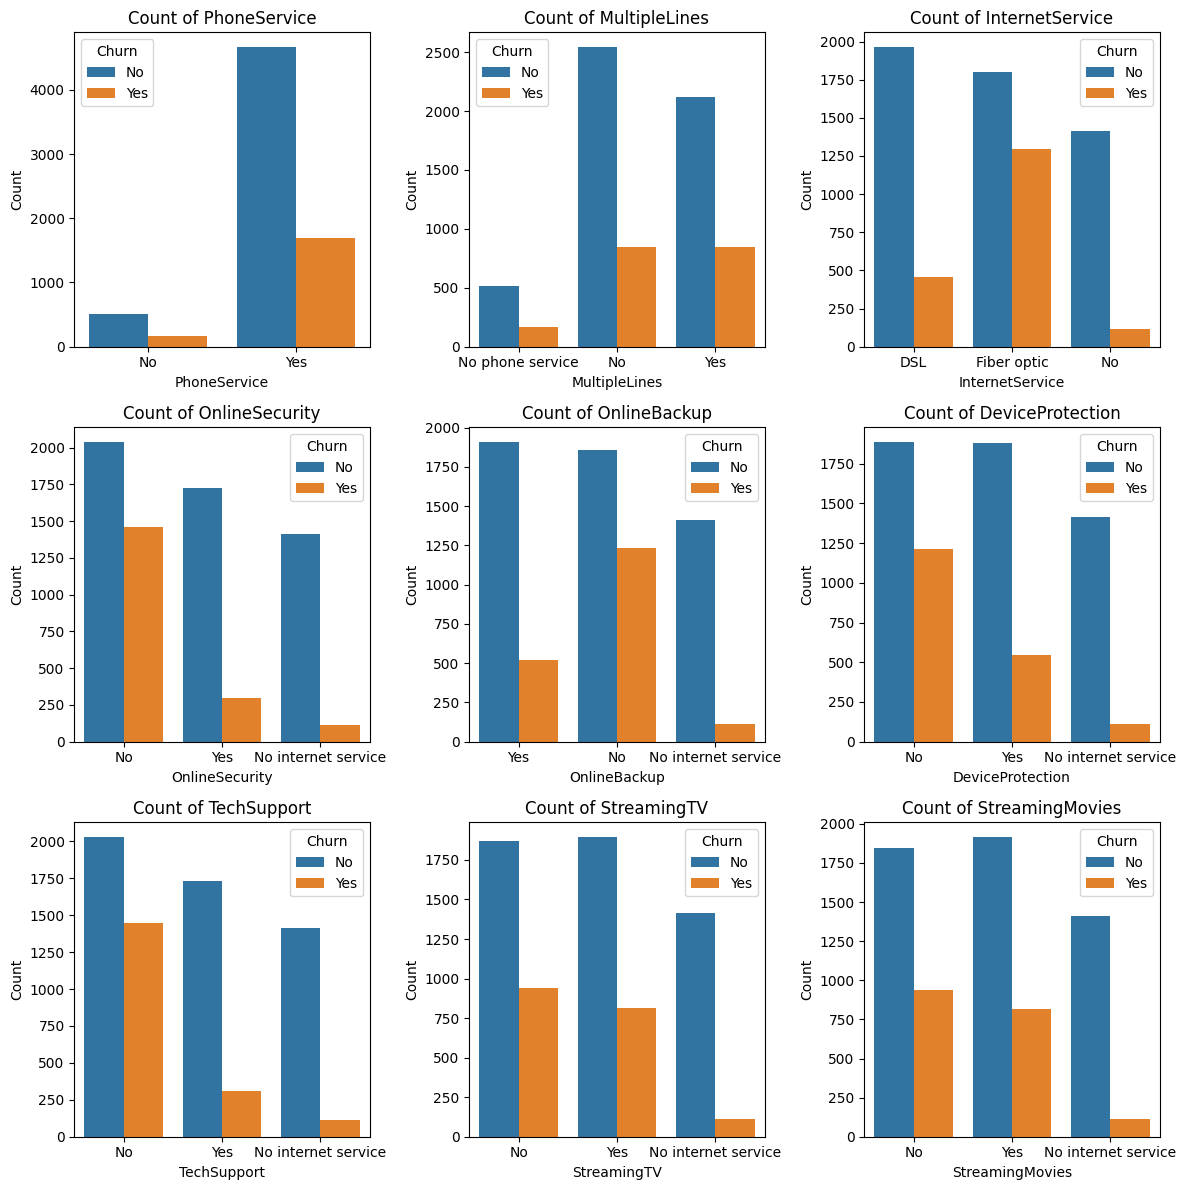

In [ ]:
# df.columns.values

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Flatten the axes to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and its corresponding axis
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f"Count of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# The majority of customers who do not Churn tend to have services like phone Service ,Internet Service particularly(DSL), and online Security enabled. For services like Online Backup, TechSupport, and Streaming TV, Churn rates are noticeably higher when these services are not used or are unavailable.

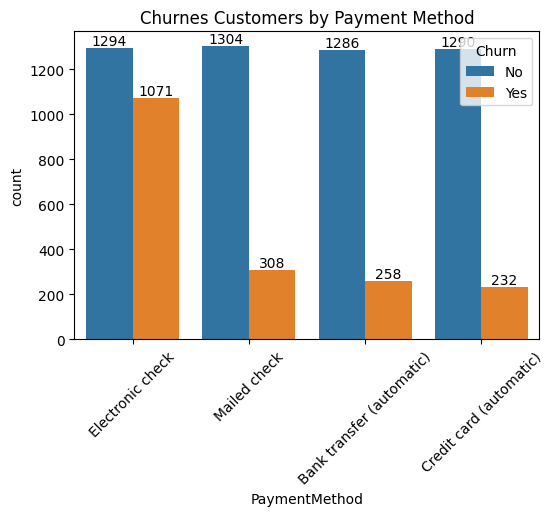

In [ ]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churnes Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method.

Conclusion :
The analysis revealed critical factors contributing to customer churn in Vodafone, including service quality, pricing strategies, and customer engagement levels. Insights derived from the project indicate that high churn rates are often associated with unsatisfactory service experiences, lack of personalized customer support, and competitive pricing from other providers.

To address these challenges, the study recommends implementing data-driven retention strategies, such as offering personalized plans, improving service quality, and deploying predictive analytics for proactive customer support. This project underscores the importance of leveraging data analysis to not only understand customer behavior but also to foster loyalty and enhance overall business performance.
